<a href="https://colab.research.google.com/github/harishahamed26/Sentimental-Analysis/blob/main/SentimentalAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importing of necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import nltk

nltk.download('punkt')  # required for Tokenizers
nltk.download('wordnet')  # required for WordNetLemmatizer
nltk.download('omw-1.4') # required for WordNetLemmatizer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import svm
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df_sentimentalDS = pd.read_csv('https://raw.githubusercontent.com/harishahamed26/Sentimental-Analysis/main/data/train.csv')
df_sentimentalDS.head(5)

,id,text,sentiment
0,549e992a42,Sooo SAD I will miss you here in San Diego!!!,negative
1,088c60f138,my boss is bullying me...,negative
2,9642c003ef,what interview! leave me alone,negative
3,358bd9e861,"Sons of ****, why couldn`t they put them on t...",negative
4,6e0c6d75b1,2am feedings for the baby are fun when he is a...,positive


In [5]:
df_sentimentalDS = df_sentimentalDS.drop('id', axis = 1)

In [6]:
df_sentimentalDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16363 entries, 0 to 16362
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       16363 non-null  object
 1   sentiment  16363 non-null  object
dtypes: object(2)
memory usage: 255.8+ KB


In [7]:
df_sentimentalDS.isna().sum()

text         0
sentiment    0
dtype: int64

In [10]:
df_sentimentalDS.describe()

,text,sentiment
count,16363,16363
unique,16363,2
top,Sooo SAD I will miss you here in San Diego!!!,positive
freq,1,8582


In [29]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_sentimentalDS['sentiment']= label_encoder.fit_transform(df_sentimentalDS['sentiment'])
df_sentimentalDS

,text,sentiment
0,Sooo SAD I will miss you here in San Diego!!!,0
1,my boss is bullying me...,0
2,what interview! leave me alone,0
3,"Sons of ****, why couldn`t they put them on t...",0
4,2am feedings for the baby are fun when he is a...,1
...,...,...
16358,enjoy ur night,1
16359,wish we could come see u on Denver husband l...,0
16360,I`ve wondered about rake to. The client has ...,0
16361,Yay good for both of you. Enjoy the break - y...,1


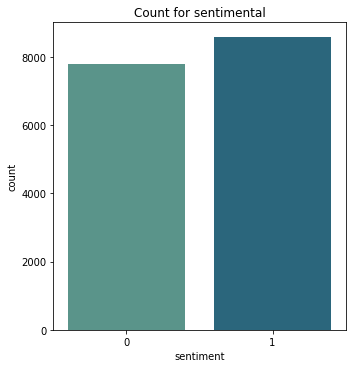

In [31]:
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(5,5))
sns.countplot(df_sentimentalDS['sentiment'], palette = 'crest')
plt.tight_layout()
plt.title('Count for sentimental')
plt.show()

In [35]:
# Converting all the strings to lower case 

df_sentimentalDS['text'] = df_sentimentalDS['text'].str.lower()

In [42]:
# Removing punctuation, special charaters and URL

df_sentimentalDS['text'] = df_sentimentalDS['text'].str.replace(r'[^\w\s]+', '') # Removing punctuations
df_sentimentalDS['text'] = df_sentimentalDS['text'].str.replace(r'http\S+', '')  # Removing URL
df_sentimentalDS['text'] = df_sentimentalDS['text'].str.replace(r'\W+', '')      # Removing Special Charaters
df_sentimentalDS['text']


0                        sooosadiwillmissyouhereinsandiego
1                                       mybossisbullyingme
2                                whatinterviewleavemealone
3        sonsofwhycouldnttheyputthemonthereleaseswealre...
4        2amfeedingsforthebabyarefunwhenheisallsmilesan...
                               ...                        
16358                                         enjoyurnight
16359    wishwecouldcomeseeuondenverhusbandlosthisjoban...
16360    ivewonderedaboutraketotheclienthasmadeitclearn...
16361    yaygoodforbothofyouenjoythebreakyouprobablynee...
16362                                      butitwasworthit
Name: text, Length: 16363, dtype: object